## Analysis
* Trend 1: Scatter plot:  shows a similar trend between the positive and negative tweets with very slight variations for all the news channels.
* Trend 2: Bar Graph: NY Times has the highest positive tweets than all the news channels. 
* Trend 3: Bar Graph: BBC World has the highest negative tweets than all the news channels.

## Performing a sentiment analysis for Twitter activity of various news organizations, extracting csv file and presenting findings visually.

In [64]:
# Dependencies
   
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sb
import time
import datetime
import matplotlib.pyplot as plt
from datetime import datetime,tzinfo,timedelta
import csv

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [65]:
# Twitter API Keys (please use your keys)
consumer_key = "mymEkFlYejolPocBMz1g1CCau"
consumer_secret = "DgPAuuvCG6Ti4dDQIJSiFbZBH8xOqvYyT3VHM4GWfFCCUGwiZa"
access_token = "17875254-tVtAYqQ1hA8ctMUCgDINRGiPyqt16GffN7MKowAkS"
access_token_secret = "pZekN6xoG3A27MujjSmRishSSEJfa0EFRfDEYPfYiaX67"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [66]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

#Other variables for dataframe
user_list = []
converted_timestamps = []
tweet_time_ago = []
tweet_text = []

In [67]:
# Target User Accounts
target_user = ("@BBCWorld","@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Loop through each user
for user in target_user:
    counter = 0
       
    # Loop through 10 pages of tweets (total 100 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).pages(100):

        # Get all tweets from home feed
        #public_tweets = api.user_timeline(user)
        page = page[0]
        tweet = json.dumps(page._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        raw_time = tweet['created_at']
        
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        date_stamp = converted_time.strftime("%m-%d-%Y")
        converted_time = converted_time.strftime("%m-%d-%Y %H:%M:%S") 
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        # Add each value to the appropriate array
        user_list.append(user)
        compound_list.append(compound)
        positive_list.append(pos)
        neutral_list.append(neu)
        negative_list.append(neg)
        
        converted_timestamps.append(converted_time)
        tweet_time_ago.append(counter)
        tweet_text.append(text)
              
        counter = counter + 1
        
        if counter % 59 == 0:
            time.sleep(60)
# Add sentiments for each tweet into an array
sentiments = {"User" : user_list,
                "Compound" : compound_list,
                "Positive" : positive_list,
                "Neutral" : neutral_list,
                "Negative" : negative_list,
                "Tweet" : tweet_text,
                "Time Stamp" : converted_timestamps,
                "Tweet_Ago" : tweet_time_ago,
               }

# Print sentiments dict.
print(sentiments)
print("")              

{'User': ['@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@BBCWorld', '@

In [68]:
# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.head()

,Compound,Negative,Neutral,Positive,Time Stamp,Tweet,Tweet_Ago,User
0,0.5719,0.000,0.598,0.402,03-10-2018 06:38:00,Chile creates law to protect its ocean habitat...,0,@BBCWorld
1,-0.7096,0.414,0.442,0.144,03-09-2018 18:39:02,Report finds US hospital failed to protect inf...,1,@BBCWorld
2,0.4019,0.000,0.803,0.197,03-09-2018 09:18:55,Russian spy: Foreign minister says Russia will...,2,@BBCWorld
3,0.0000,0.000,1.000,0.000,03-09-2018 01:37:24,RT @BBCKarishma: As @POTUS announces he's goin...,3,@BBCWorld
4,0.0000,0.000,1.000,0.000,03-08-2018 16:44:53,"RT @bbc5live: “He was a gem""\n\nOscar-winning ...",4,@BBCWorld


In [69]:
#Export dataframe in csv file
Sentiment_Analysis_of_News_Organizations = sentiments_df.to_csv('Sentiment Analysis of News Organizations.csv')

## Sentiment Analysis of Media Tweets

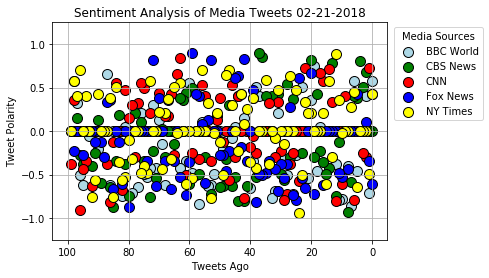

In [80]:
BBCWorld = sentiments_df[(sentiments_df.User == "@BBCWorld")]
CBSNews = sentiments_df[(sentiments_df.User == "@CBSNews")]
CNN = sentiments_df[(sentiments_df.User == "@CNN")]
FoxNews = sentiments_df[(sentiments_df.User == "@FoxNews")]
NYTimes = sentiments_df[(sentiments_df.User == "@nytimes")]


plt.scatter(BBCWorld["Tweet_Ago"], BBCWorld["Compound"], label = "BBC World", marker="o", s=100, c=["lightblue"], edgecolors="black")
plt.scatter(CBSNews["Tweet_Ago"], CBSNews["Compound"], label = "CBS News", marker="o",s=100, c=["green"], edgecolors="black")
plt.scatter(CNN["Tweet_Ago"], CNN["Compound"], label = "CNN", marker="o", c=["red"],s=100, edgecolors="black")
plt.scatter(FoxNews["Tweet_Ago"], FoxNews["Compound"], label = "Fox News", marker="o",s=100, c=["blue"], edgecolors="black")
plt.scatter(NYTimes["Tweet_Ago"], NYTimes["Compound"], label = "NY Times", marker="o",s=100, c=["yellow"], edgecolors="black")

# Plot field size
plt.xlim(-5, counter + 5)
plt.ylim(-1.25, 1.25)

# Incorporate the other graph properties
plt.title('Sentiment Analysis of Media Tweets' + ' ' + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)

plt.legend(title='Media Sources', bbox_to_anchor=(1.3, 1))

# Save the figure
plt.savefig('Sentiment Analysis of Media Tweets.png')

# invert x axis
ax = plt.gca()
ax.invert_xaxis()

# Show plot
plt.show()

## Overall Media Sentiment based on Twitter

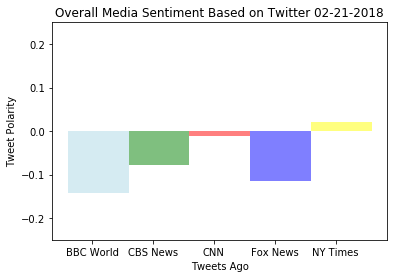

In [82]:
BBCWorld = sentiments_df[(sentiments_df.User == "@BBCWorld")]
CBSNews = sentiments_df[(sentiments_df.User == "@CBSNews")]
CNN = sentiments_df[(sentiments_df.User == "@CNN")]
FoxNews = sentiments_df[(sentiments_df.User == "@FoxNews")]
NYTimes = sentiments_df[(sentiments_df.User == "@nytimes")]

BBCWorld_avg_compound = BBCWorld.mean()["Compound"]
CBSNews_avg_compound = CBSNews.mean()["Compound"]
CNN_avg_compound = CNN.mean()["Compound"]
FoxNews_avg_compound = FoxNews.mean()["Compound"]
NYTimes_avg_compound = NYTimes.mean()["Compound"]

# Creating a list for each new channe's average compound values
news_avg_list = [BBCWorld_avg_compound, CBSNews_avg_compound, CNN_avg_compound, FoxNews_avg_compound, NYTimes_avg_compound]
x_axis = np.arange(len(news_avg_list))

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, news_avg_list, width=1, color=["lightblue", "green", "red", "blue", "yellow"], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC World", "CBS News", "CNN", "Fox News", "NY Times"])

# Plot field size
plt.ylim(-.25, .25)

# Incorporate the other graph properties
plt.title('Overall Media Sentiment Based on Twitter'+ ' '  + str(date_stamp))
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')
plt.grid(False)

# # Save the figure
plt.savefig('Overall Media Sentiment Based on Twitter, Compound Sentiment.png')

# Show plot
plt.show()